# Apply knn to the “Surface defects in stainless steel plates” and identify the differences

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#df = pd.read_csv('/kaggle/input/faulty-steel-plates/faults.csv')

In [ ]:
# read the data here
df = pd.read_csv('faults.csv')

In [ ]:
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [ ]:
df.isnull().values.any()

False

In [ ]:
y_df =df[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]]
X = df[df.columns.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"])]
X.head(10)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
5,430,441,100250,100337,630,20,87,62357,64,127,...,0.0079,0.5500,1.0000,1.0,2.7993,1.0414,1.9395,0.8736,-0.2267,0.9874
6,413,446,138468,138883,9052,230,432,1481991,23,199,...,0.0196,0.1435,0.9607,1.0,3.9567,1.5185,2.6181,0.9205,0.2791,1.0000
7,190,200,210936,210956,132,11,20,20007,124,172,...,0.0059,0.9091,1.0000,1.0,2.1206,1.0000,1.3010,0.5000,0.1841,0.3359
8,330,343,429227,429253,264,15,26,29748,53,148,...,0.0077,0.8667,1.0000,1.0,2.4216,1.1139,1.4150,0.5000,-0.1197,0.5593
9,74,90,779144,779308,1506,46,167,180215,53,143,...,0.0095,0.3478,0.9820,1.0,3.1778,1.2041,2.2148,0.9024,-0.0651,1.0000


In [ ]:
y = []
for i in range(y_df.shape[0]):
    if y_df["Pastry"].values[i] == 1:
        y.append("Pastry")
    elif y_df["Z_Scratch"].values[i] == 1:
        y.append("Z_Scratch")
    elif y_df["K_Scatch"].values[i] == 1:
        y.append("K_Scatch")
    elif y_df["Stains"].values[i] == 1:
        y.append("Stains")
    elif y_df["Dirtiness"].values[i] == 1:
        y.append("Dirtiness")
    elif y_df["Bumps"].values[i] == 1:
        y.append("Bumps")
    else:
        y.append("Other_Faults")
print(y)

['Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry', 'Pastry',

In [ ]:
df1= df.drop(y,axis=1)
df1

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919


In [ ]:
df1['target']=y

In [ ]:
df1

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,Other_Faults
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,Other_Faults
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,Other_Faults
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,Other_Faults


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

Text(0, 0.5, 'Number of classes in the dataset')

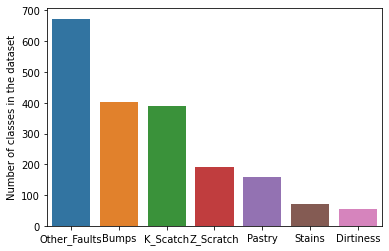

In [ ]:
tc= df1['target'].value_counts()
tcb = sn.barplot(x = tc.index,y = tc.values)
tcb.set_ylabel('Number of classes in the dataset')


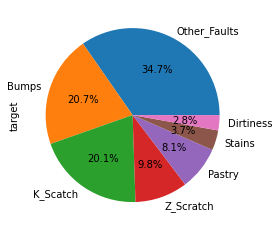

In [ ]:
tc.plot.pie(autopct="%1.1f%%")

In [ ]:
x = df1[df1.columns.drop(['target'])]
y = df1['target']

In [ ]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

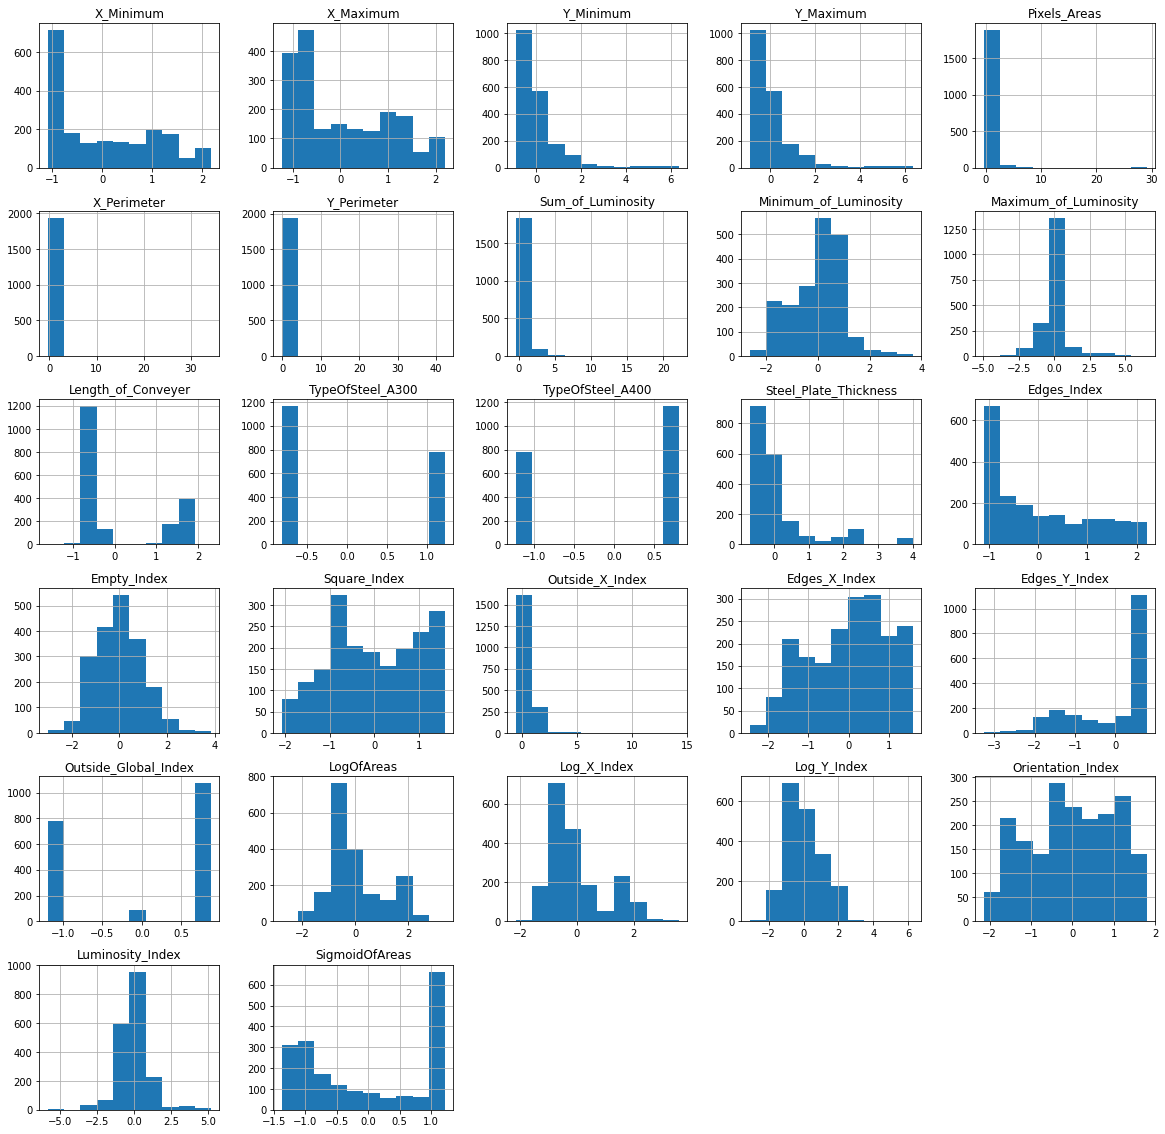

In [ ]:
X.hist(figsize=(20,20))
plt.show()

In [ ]:
X.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651


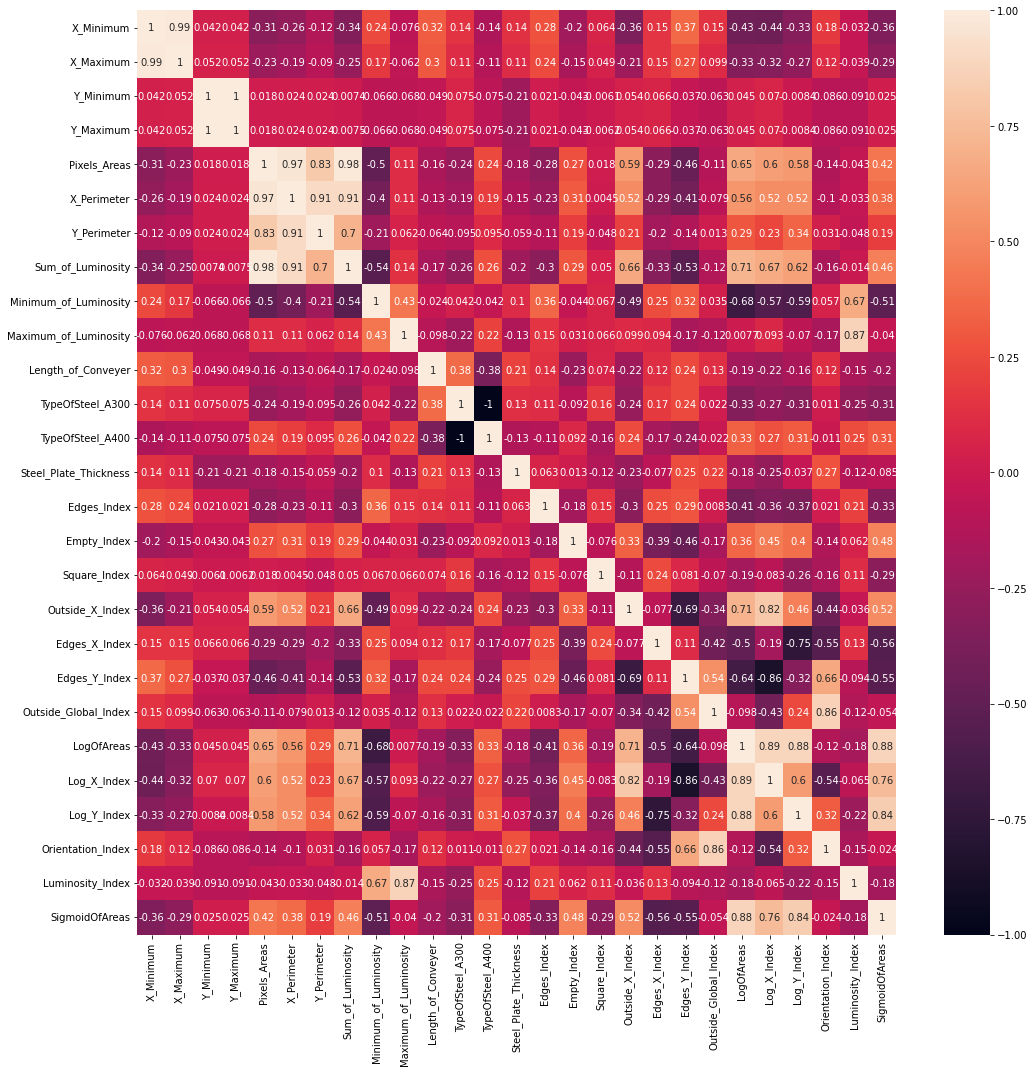

In [ ]:
plt.figure(figsize=(17,17))
sn.heatmap(X.corr(),annot=True)
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5, random_state =90)

# Using KNNClassifier

In [ ]:
kn=KNeighborsClassifier(n_neighbors=6)
kn.fit(X_train,y_train)

y_pred = kn.predict(X_test)


In [ ]:
start = time.time()
kntr=kn.score(X_train,y_train)
end = time.time()
print(kntr)
print(end-start, "sec")

0.7639175257731958
0.088653564453125 sec


In [ ]:
start = time.time()
knt=kn.score(X_test,y_test)
end = time.time()
print(knt)
print(end-start, "sec")

0.7157569515962925
0.0939936637878418 sec


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[142   3   1  37   4   0   6]
 [  4  16   0   4   1   0   0]
 [  4   0 195   2   1   1   0]
 [ 87   5  16 203  12   2  17]
 [ 14   4   0  29  28   0   1]
 [  3   0   0   2   0  29   0]
 [  5   1   2   8   0   0  82]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.55      0.74      0.63       193
   Dirtiness       0.55      0.64      0.59        25
    K_Scatch       0.91      0.96      0.94       203
Other_Faults       0.71      0.59      0.65       342
      Pastry       0.61      0.37      0.46        76
      Stains       0.91      0.85      0.88        34
   Z_Scratch       0.77      0.84      0.80        98

    accuracy                           0.72       971
   macro avg       0.72      0.71      0.71       971
weighted avg       0.72      0.72      0.71       971



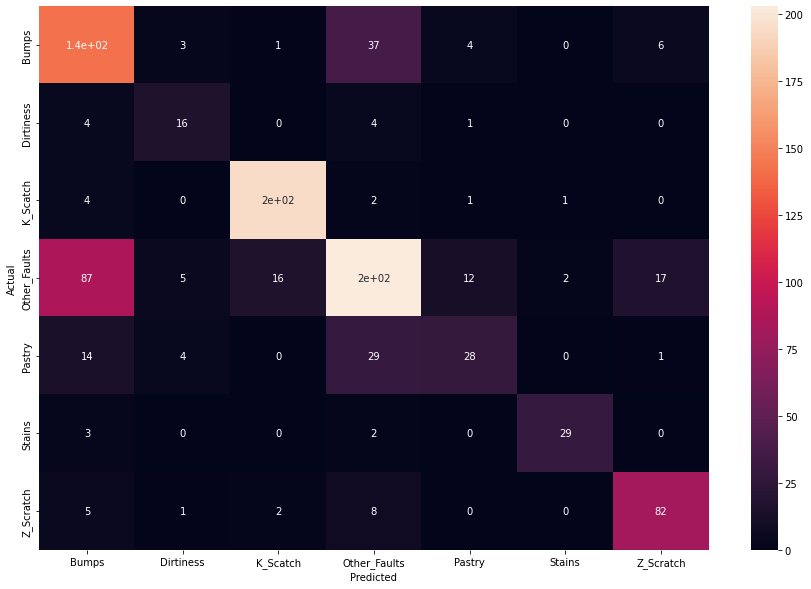

In [ ]:
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sn.heatmap(df_cm,annot=True)
plt.savefig("KNN.pdf")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

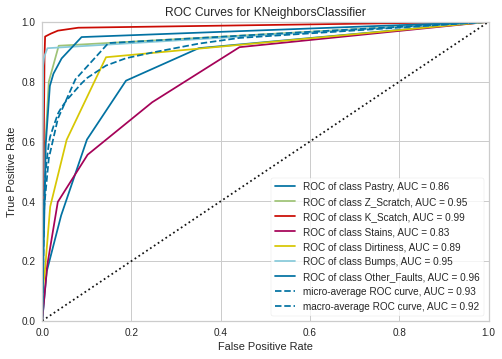

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
#from sklearn.linear_model import KNN
#kn=KNeighborsClassifier(n_neighbors=6)
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC

X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

model = KNeighborsClassifier()
visualizer = ROCAUC(model, classes=["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

## Using SVM

In [ ]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)

In [ ]:
start = time.time()
svmt=SVM.score(X_train,y_train)
print(svmt)
end = time.time()
print(end-start, "sec")

0.7762886597938145
0.07386231422424316 sec


In [ ]:
start = time.time()
lmt=SVM.score(X_test,y_test)
print(lmt)
end = time.time()
print(end-start, "sec")

0.7600411946446962
0.07593059539794922 sec


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.64      0.68      0.66       193
   Dirtiness       0.74      0.56      0.64        25
    K_Scatch       0.97      0.96      0.97       203
Other_Faults       0.71      0.74      0.72       342
      Pastry       0.64      0.46      0.53        76
      Stains       0.94      0.88      0.91        34
   Z_Scratch       0.79      0.83      0.81        98

    accuracy                           0.76       971
   macro avg       0.77      0.73      0.75       971
weighted avg       0.76      0.76      0.76       971



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[131   1   0  50   6   0   5]
 [  2  14   0   8   1   0   0]
 [  2   0 195   4   1   1   0]
 [ 58   3   4 252  12   1  12]
 [  5   0   0  31  35   0   5]
 [  2   0   0   2   0  30   0]
 [  6   1   1   9   0   0  81]]


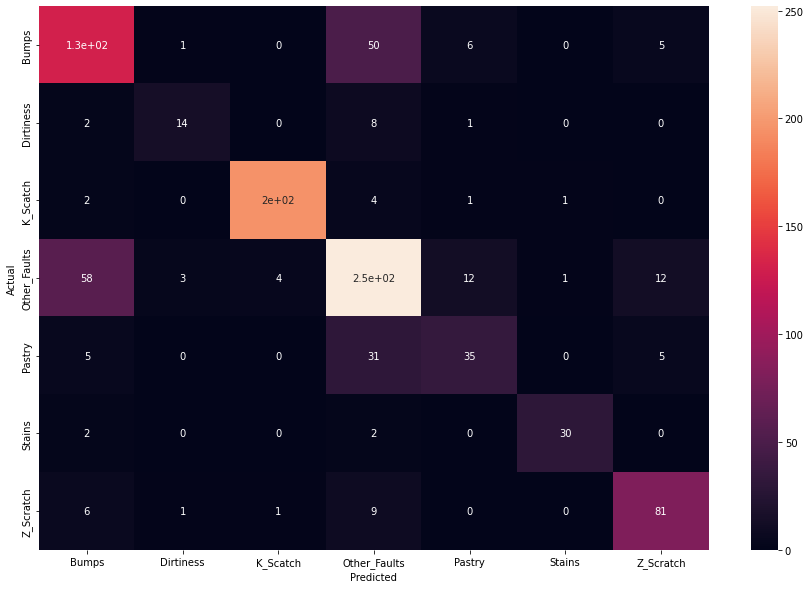

In [ ]:
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sn.heatmap(df_cm,annot=True)
plt.savefig("svm.pdf")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Using Logistic regression

In [ ]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:

y_pred_LogReg = LogReg.predict(X_test)


In [ ]:
start = time.time()
l=LogReg.score(X_train,y_train)
end = time.time()
print(l)
print(end-start, "sec")

0.7391752577319588
0.005035400390625 sec


In [ ]:
print(confusion_matrix(y_test, y_pred_LogReg))

[[120   1   1  57  10   0   4]
 [  2  15   0   7   1   0   0]
 [  1   0 192   8   1   1   0]
 [ 56  13  13 224  21   2  13]
 [  5   2   1  22  41   0   5]
 [  1   0   0   2   0  31   0]
 [  1   1   2   8   1   0  85]]


In [ ]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_LogReg))

              precision    recall  f1-score   support

       Bumps       0.65      0.62      0.63       193
   Dirtiness       0.47      0.60      0.53        25
    K_Scatch       0.92      0.95      0.93       203
Other_Faults       0.68      0.65      0.67       342
      Pastry       0.55      0.54      0.54        76
      Stains       0.91      0.91      0.91        34
   Z_Scratch       0.79      0.87      0.83        98

    accuracy                           0.73       971
   macro avg       0.71      0.73      0.72       971
weighted avg       0.73      0.73      0.73       971



In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
start = time.time()
lg = accuracy_score(y_pred_LogReg,y_test)
end =time.time()
print('accuracy is', lg)
print(end-start, "sec")

accuracy is 0.729145211122554
0.0020880699157714844 sec


In [ ]:
#cm = confusion_matrix(y_test, y_pred_LogReg)
#print(cm)

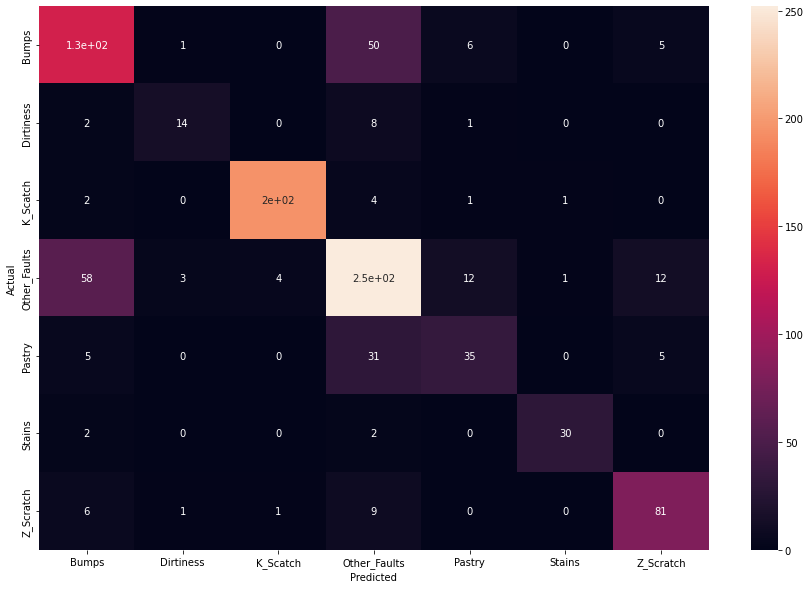

In [ ]:
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sn.heatmap(df_cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#["Decision Tree",Dc],["Random Forest",rc]

In [ ]:
df2=pd.DataFrame([["KNN",knt],["Logistic regression",lg],["SVM",lmt]],columns=["models","accuracy"])
df2

,models,accuracy
0,KNN,0.715757
1,Logistic regression,0.729145
2,SVM,0.760041


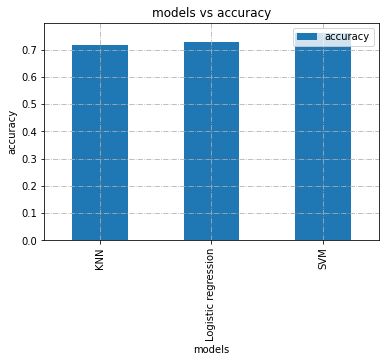

In [ ]:
e=pd.DataFrame(df2.groupby('models')['accuracy'].mean())
e.plot.bar(title='models vs accuracy')
plt.xlabel("models")
plt.ylabel("accuracy")
plt.grid(linestyle='-.')

### Random forest classifier has more accuracy compare to other classifier models

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


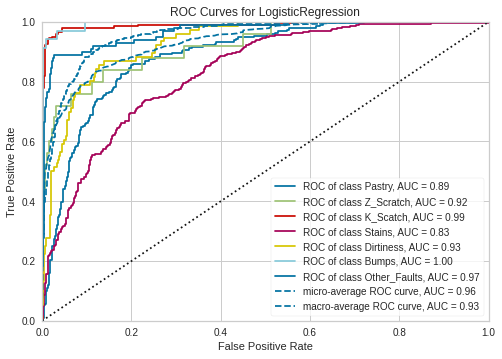

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC

X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

model = LogisticRegression()
visualizer = ROCAUC(model, classes=["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


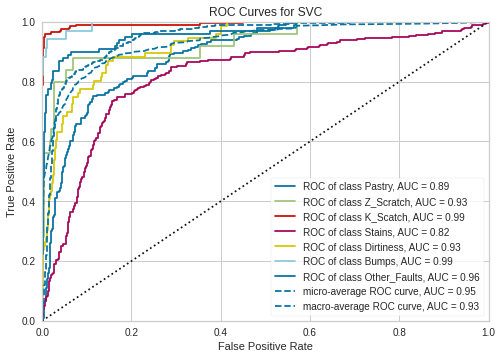

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC

X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

model = svm.SVC()
visualizer = ROCAUC(SVM, classes=["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [ ]:
# the decision tree and random forest are for future work

## Using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DC=DecisionTreeClassifier()
DC.fit(X_train,y_train)
y_pred = DC.predict(X_test)


In [ ]:
Dcr=DC.score(X_train,y_train)
print(Dcr)

1.0


In [ ]:
Dc=DC.score(X_test,y_test)
print(Dc)

0.7353244078269825


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.62      0.57      0.60       193
   Dirtiness       0.61      0.80      0.69        25
    K_Scatch       0.94      0.97      0.95       203
Other_Faults       0.68      0.69      0.68       342
      Pastry       0.50      0.50      0.50        76
      Stains       0.90      0.82      0.86        34
   Z_Scratch       0.85      0.89      0.87        98

    accuracy                           0.74       971
   macro avg       0.73      0.75      0.74       971
weighted avg       0.73      0.74      0.73       971



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[131   1   0  50   6   0   5]
 [  2  14   0   8   1   0   0]
 [  2   0 195   4   1   1   0]
 [ 58   3   4 252  12   1  12]
 [  5   0   0  31  35   0   5]
 [  2   0   0   2   0  30   0]
 [  6   1   1   9   0   0  81]]


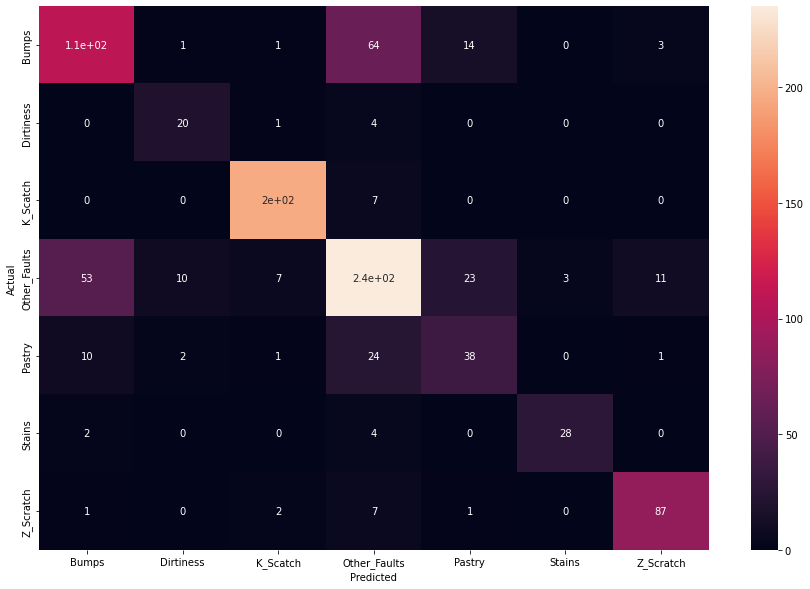

In [ ]:
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sn.heatmap(df_cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rtc=RandomForestClassifier()
Rtc.fit(X_train,y_train)
y_pred = Rtc.predict(X_test)


In [ ]:
rct=Rtc.score(X_train,y_train)
print(rct)

In [ ]:
rc=Rtc.score(X_test,y_test)
print(rc)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
plt.figure(figsize=(15,10))
categories = np.unique(y)
df_cm = pd.DataFrame(cm, index = [i for i in categories], columns = [i for i in categories])
sn.heatmap(df_cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()